<a href="https://colab.research.google.com/github/Janebhop/fraud-detection-course/blob/main/notebook/chapter3/Chapter3_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Data

In [3]:
dataPath = '/content/drive/My Drive/fraud/PS_20174392719_1491204439457_log.csv'

In [4]:
df_test = pd.read_csv(dataPath, nrows=10)

float_cols = [c for c in df_test if df_test[c].dtype == "float64"]
float32_cols = {c: np.float32 for c in float_cols}

In [5]:
float_cols

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

In [6]:
data = pd.read_csv(dataPath, engine='c', dtype=float32_cols)
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9.839640e+03,C1231006815,170136.000,160296.359375,M1979787155,0.000000e+00,0.000,0,0
1,1,PAYMENT,1.864280e+03,C1666544295,21249.000,19384.720703,M2044282225,0.000000e+00,0.000,0,0
2,1,TRANSFER,1.810000e+02,C1305486145,181.000,0.000000,C553264065,0.000000e+00,0.000,1,0
3,1,CASH_OUT,1.810000e+02,C840083671,181.000,0.000000,C38997010,2.118200e+04,0.000,1,0
4,1,PAYMENT,1.166814e+04,C2048537720,41554.000,29885.859375,M1230701703,0.000000e+00,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,3.396821e+05,C786484425,339682.125,0.000000,C776919290,0.000000e+00,339682.125,1,0
6362616,743,TRANSFER,6.311410e+06,C1529008245,6311409.500,0.000000,C1881841831,0.000000e+00,0.000,1,0
6362617,743,CASH_OUT,6.311410e+06,C1162922333,6311409.500,0.000000,C1365125890,6.848884e+04,6379898.000,1,0
6362618,743,TRANSFER,8.500025e+05,C1685995037,850002.500,0.000000,C2080388513,0.000000e+00,0.000,1,0


### Preprocessing

In [7]:
# cleaning data 
# checking null values

data.isnull().values.any()

False

In [8]:
# feature selection
data = data.drop(['nameOrig','nameDest'],axis = 1)

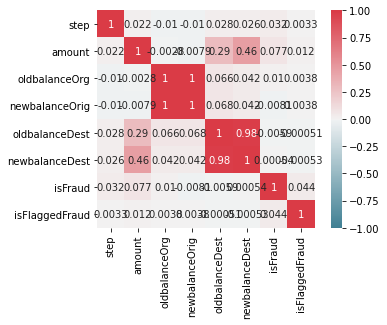

In [9]:
corr = data.corr()
sns.heatmap(corr,vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True)
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

In [10]:
# feature engineering

dummy_type = pd.get_dummies(data['type'])
dummy_type

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362615,0,1,0,0,0
6362616,0,0,0,0,1
6362617,0,1,0,0,0
6362618,0,0,0,0,1


In [11]:
data = (pd.concat([data,dummy_type], axis = 1).reset_index(drop = True)).drop(['type'],axis = 1)[['step','CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud','isFraud']]
data

,step,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,0,0,0,1,0,9.839640e+03,170136.000,160296.359375,0.000000e+00,0.000,0,0
1,1,0,0,0,1,0,1.864280e+03,21249.000,19384.720703,0.000000e+00,0.000,0,0
2,1,0,0,0,0,1,1.810000e+02,181.000,0.000000,0.000000e+00,0.000,0,1
3,1,0,1,0,0,0,1.810000e+02,181.000,0.000000,2.118200e+04,0.000,0,1
4,1,0,0,0,1,0,1.166814e+04,41554.000,29885.859375,0.000000e+00,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,0,1,0,0,0,3.396821e+05,339682.125,0.000000,0.000000e+00,339682.125,0,1
6362616,743,0,0,0,0,1,6.311410e+06,6311409.500,0.000000,0.000000e+00,0.000,0,1
6362617,743,0,1,0,0,0,6.311410e+06,6311409.500,0.000000,6.848884e+04,6379898.000,0,1
6362618,743,0,0,0,0,1,8.500025e+05,850002.500,0.000000,0.000000e+00,0.000,0,1


In [12]:
data['errorBalanceOrig'] = data['newbalanceOrig'] + data['amount'] - data['oldbalanceOrg']
data['errorBalanceDest'] = data['oldbalanceDest'] + data['amount'] - data['newbalanceDest']
data

,step,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,errorBalanceOrig,errorBalanceDest
0,1,0,0,0,1,0,9.839640e+03,170136.000,160296.359375,0.000000e+00,0.000,0,0,0.0,9.839640e+03
1,1,0,0,0,1,0,1.864280e+03,21249.000,19384.720703,0.000000e+00,0.000,0,0,0.0,1.864280e+03
2,1,0,0,0,0,1,1.810000e+02,181.000,0.000000,0.000000e+00,0.000,0,1,0.0,1.810000e+02
3,1,0,1,0,0,0,1.810000e+02,181.000,0.000000,2.118200e+04,0.000,0,1,0.0,2.136300e+04
4,1,0,0,0,1,0,1.166814e+04,41554.000,29885.859375,0.000000e+00,0.000,0,0,0.0,1.166814e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,0,1,0,0,0,3.396821e+05,339682.125,0.000000,0.000000e+00,339682.125,0,1,0.0,0.000000e+00
6362616,743,0,0,0,0,1,6.311410e+06,6311409.500,0.000000,0.000000e+00,0.000,0,1,0.0,6.311410e+06
6362617,743,0,1,0,0,0,6.311410e+06,6311409.500,0.000000,6.848884e+04,6379898.000,0,1,0.0,5.000000e-01
6362618,743,0,0,0,0,1,8.500025e+05,850002.500,0.000000,0.000000e+00,0.000,0,1,0.0,8.500025e+05


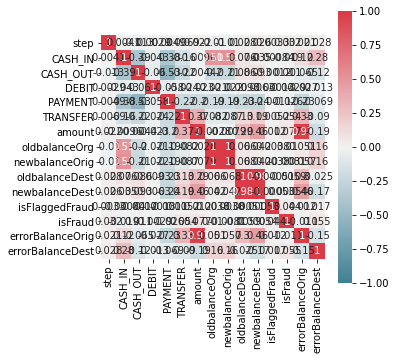

In [13]:
corr = data.corr()
sns.heatmap(corr,vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True)
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

In [14]:
# splitting data

# fraud and no fraud transactions are separated by 'isFraud' column
dataF = data[data['isFraud'] == 1]
dataNF = data[data['isFraud'] == 0]

# split fraud transactions into 80 percent and 20 percent sessions
mskF = np.random.rand(len(dataF)) < 0.8
trainF = dataF[mskF]
testF = dataF[~mskF]

# split no fraud transactions into 80 percent and 20 percent sessions
mskNF = np.random.rand(len(dataNF)) < 0.8
trainNF = dataNF[mskNF]
testNF = dataNF[~mskNF]

# create training data and testing data
train_data = pd.concat([trainF,trainNF]).reset_index(drop = True)
test_data = pd.concat([testF,testNF]).reset_index(drop = True)

#create input data attributes by dropped irrevalent and target column 
train_feature = train_data.drop(['isFraud'],axis = 1)
test_feature = test_data.drop(['isFraud'],axis = 1)

train_label = train_data['isFraud']
test_label = test_data['isFraud']

In [15]:
# feature scaling

scaler = preprocessing.StandardScaler()
train_feature_scaled =scaler.fit_transform(train_feature)

test_feature_scaled = scaler.transform(test_feature)

In [16]:
train_feature_scaled[1]

array([-1.70349157e+00, -5.30829937e-01,  1.35786239e+00, -8.09232020e-02,
       -7.14953576e-01, -3.02351414e-01, -2.97646959e-01, -2.88600189e-01,
       -2.92389747e-01, -3.17240177e-01, -3.32848669e-01, -1.46989960e-03,
       -3.31619215e-01, -7.77653893e-02])

In [17]:
col = ['step', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER', 'amount',
       'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'isFlaggedFraud', 'errorBalanceOrig', 'errorBalanceDest']

In [18]:
data_feature_train = pd.DataFrame(data=train_feature_scaled, columns=col)
data_feature_train

,step,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
0,-1.703492,-0.53083,-0.736452,-0.080923,-0.714954,3.307410,-0.297647,-0.288600,-0.292390,-0.323468,-0.332849,-0.00147,-0.331619,-0.125754
1,-1.703492,-0.53083,1.357862,-0.080923,-0.714954,-0.302351,-0.297647,-0.288600,-0.292390,-0.317240,-0.332849,-0.00147,-0.331619,-0.077765
2,-1.703492,-0.53083,-0.736452,-0.080923,-0.714954,3.307410,-0.293299,-0.287692,-0.292390,-0.323468,-0.332849,-0.00147,-0.331619,-0.119807
3,-1.703492,-0.53083,1.357862,-0.080923,-0.714954,-0.302351,-0.293299,-0.287692,-0.292390,-0.315764,-0.332849,-0.00147,-0.331619,-0.060445
4,-1.703492,-0.53083,-0.736452,-0.080923,-0.714954,3.307410,-0.264607,-0.281702,-0.292390,-0.323468,-0.332849,-0.00147,-0.331619,-0.080563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091173,3.334778,-0.53083,-0.736452,-0.080923,1.398692,-0.302351,-0.291140,-0.286753,-0.291908,-0.323468,-0.332849,-0.00147,-0.331619,-0.116854
5091174,3.334778,-0.53083,-0.736452,-0.080923,1.398692,-0.302351,-0.283645,-0.109239,-0.118103,-0.323468,-0.332849,-0.00147,-0.331619,-0.106603
5091175,3.334778,-0.53083,1.357862,-0.080923,-0.714954,-0.302351,-0.034267,-0.287328,-0.292390,-0.323468,-0.289571,-0.00147,-0.075456,-0.126164
5091176,3.334778,-0.53083,1.357862,-0.080923,-0.714954,-0.302351,0.010598,-0.230545,-0.292390,-0.316149,-0.275439,-0.00147,-0.301558,-0.126164


In [19]:
train_label.to_frame()

,isFraud
0,1
1,1
2,1
3,1
4,1
...,...
5091173,0
5091174,0
5091175,0
5091176,0


In [20]:
data_feature_test = pd.DataFrame(data=test_feature_scaled, columns=col)
data_feature_test

,step,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
0,-1.703492,-0.53083,-0.736452,-0.080923,-0.714954,3.307410,-0.239867,-0.276536,-0.292390,-0.323468,-0.332849,-0.00147,-0.331619,-0.046726
1,-1.703492,-0.53083,-0.736452,-0.080923,-0.714954,3.307410,-0.256418,-0.279992,-0.292390,-0.323468,-0.332849,-0.00147,-0.331619,-0.069364
2,-1.696465,-0.53083,-0.736452,-0.080923,-0.714954,3.307410,-0.273184,-0.283493,-0.292390,-0.323468,-0.332849,-0.00147,-0.331619,-0.092295
3,-1.689438,-0.53083,1.357862,-0.080923,-0.714954,-0.302351,-0.280489,-0.285018,-0.292390,-0.323468,-0.329983,-0.00147,-0.331619,-0.126164
4,-1.682411,-0.53083,-0.736452,-0.080923,-0.714954,3.307410,-0.275242,-0.283922,-0.292390,-0.323468,-0.332849,-0.00147,-0.331619,-0.095110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271437,3.334778,-0.53083,-0.736452,-0.080923,1.398692,-0.302351,-0.284674,-0.149753,-0.157910,-0.323468,-0.332849,-0.00147,-0.331619,-0.108010
1271438,3.334778,-0.53083,-0.736452,-0.080923,1.398692,-0.302351,-0.280945,-0.277938,-0.285302,-0.323468,-0.332849,-0.00147,-0.331619,-0.102910
1271439,3.334778,-0.53083,-0.736452,-0.080923,1.398692,-0.302351,-0.279201,-0.286188,-0.292390,-0.323468,-0.332849,-0.00147,-0.324755,-0.100524
1271440,3.334778,-0.53083,-0.736452,-0.080923,1.398692,-0.302351,-0.291984,-0.286872,-0.291851,-0.323468,-0.332849,-0.00147,-0.331619,-0.118009


In [21]:
test_label.to_frame()

,isFraud
0,1
1,1
2,1
3,1
4,1
...,...
1271437,0
1271438,0
1271439,0
1271440,0


## Logistic Regression

Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables
    
    class sklearn.linear_model.LogisticRegression (penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(train_feature_scaled,train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# predict train data
lr_predY_train = clf.predict(train_feature_scaled)

In [24]:
# predict test data
lr_predY = clf.predict(test_feature_scaled)
lr_predY[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## XGBoost 

XGBoost stands for Extreme Gradient Boosting; it is a specific implementation of the Gradient Boosting method which uses more accurate approximations to find the best tree model. It employs a number of nifty tricks that make it exceptionally successful, particularly with structured data.

XGBoost's hyperparameters

    -learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
    -max_depth: determines how deeply each tree is allowed to grow during any boosting round.
    -subsample: percentage of samples used per tree. Low value can lead to underfitting.
    -colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
    -n_estimators: number of trees you want to build.
    -objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

    -gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
    -alpha: L1 regularization on leaf weights. A large value leads to more regularization.
    -lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [25]:
from xgboost.sklearn import XGBClassifier

In [26]:
%%time
from xgboost.sklearn import XGBClassifier
xgbc = XGBClassifier(objective='binary:logistic',max_depth=3)


xgbc.fit(train_feature_scaled, train_label)

[21:34:58] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
CPU times: user 14min 13s, sys: 1.17 s, total: 14min 14s
Wall time: 14min 15s


In [27]:
 # predict train data
xgb_predY_train = xgbc.predict(train_feature_scaled)

In [28]:
# predict test data
xgb_predY = xgbc.predict(test_feature_scaled)
xgb_predY[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Model Evaluation

### Confusion Matrix

confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa)

![image.png](attachment:image.png)


https://en.wikipedia.org/wiki/Confusion_matrix

--------------------------------------------
Accuracy: Overall, how often is the classifier correct?
    
    Accuracy = (TP+TN)/total = (TP+TN)/(TP+TN+FN+FP)

Precision: When it predicts yes, how often is it correct?

    Precision = TP/predicted yes = TP/(TP+FP)
    
Recall: When it's actually yes, how often does it predict yes? (True Positive Rate)

    Recall = TP/actual yes = TP/(TP+FN)
    
F1 Score: This is a weighted average of the recall and precision

    F1 Score = (2*(Precision*Recall))/(Precision+Recall)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

def evaluation_metrics(types,label_train,predict_train,label_test,predict_test):
  print("Accuracy score in",types, ": Train =" ,accuracy_score(label_train,predict_train), " , Test = ",accuracy_score(label_test,predict_test))
  print("Precision score in ",types, ": Train =" ,precision_score(label_train,predict_train), " , Test = ",precision_score(label_test,predict_test))
  print("Recall score in ",types, ": Train =",recall_score(label_train,predict_train), " , Test = ",recall_score(label_test,predict_test))
  print("F1 score score in ",types, ": Train =" ,f1_score(label_train,predict_train), " , Test = ",f1_score(label_test,predict_test))

In [30]:
evaluation_metrics("Logistic Regression",train_label,lr_predY_train,test_label,lr_predY)

Accuracy score in Logistic Regression : Train = 0.9992987870390704  , Test =  0.9992803446795057
Precision score in  Logistic Regression : Train = 0.9118942731277533  , Test =  0.9088888888888889
Recall score in  Logistic Regression : Train = 0.5047241694605303  , Test =  0.4954572986069049
F1 score score in  Logistic Regression : Train = 0.6497939964685109  , Test =  0.6413171305370442


In [31]:
cm_lr = confusion_matrix(lr_predY,test_label,labels=[1,0])
cm_lr

array([[    818,      82],
       [    833, 1269709]])

In [32]:
evaluation_metrics("XGBoost",train_label,xgb_predY_train,test_label,xgb_predY)

Accuracy score in XGBoost : Train = 0.9999935181995209  , Test =  0.9999921349145301
Precision score in  XGBoost : Train = 0.9983208670431996  , Test =  0.9993913572732805
Recall score in  XGBoost : Train = 0.9966473636086559  , Test =  0.9945487583282859
F1 score score in  XGBoost : Train = 0.9974834134065432  , Test =  0.9969641772920462


In [33]:
cm_xgb = confusion_matrix(xgb_predY,test_label,labels=[1, 0])
cm_xgb

array([[   1642,       1],
       [      9, 1269790]])

## Random OverSampling 

Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

This technique can be effective for those machine learning algorithms that are affected by a skewed distribution and where multiple duplicate examples for a given class can influence the fit of the model

In [34]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler()
train_feature_resampled, train_label_resampled = ros.fit_sample(train_feature, train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [35]:
scaler = preprocessing.StandardScaler()
train_feature_scaled =scaler.fit_transform(train_feature_resampled)
test_feature_scaled = scaler.transform(test_feature)

In [36]:
clf_ros = LogisticRegression(random_state=0)
clf_ros.fit(train_feature_scaled,train_label_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
lr_predY_ros_train = clf_ros.predict(train_feature_scaled)

In [38]:
lr_predY_ros = clf_ros.predict(test_feature_scaled)


In [39]:
evaluation_metrics("Logistic Regession after RandomOverSampling",train_label_resampled,lr_predY_ros_train,test_label,lr_predY_ros)

Accuracy score in Logistic Regession after RandomOverSampling : Train = 0.96632734900728  , Test =  0.951407928949964
Precision score in  Logistic Regession after RandomOverSampling : Train = 0.9529291646171699  , Test =  0.025473886898467465
Recall score in  Logistic Regession after RandomOverSampling : Train = 0.9811179447966178  , Test =  0.9775893397940641
F1 score score in  Logistic Regession after RandomOverSampling : Train = 0.9668181286538939  , Test =  0.049653899400092294


In [40]:
cm_lr_ros = confusion_matrix(lr_predY_ros,test_label,labels=[1, 0])
cm_lr_ros

array([[   1614,   61745],
       [     37, 1208046]])

## Random Undersampling

Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.

This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset. This process can be repeated until the desired class distribution is achieved, such as an equal number of examples for each class

A limitation of undersampling is that examples from the majority class are deleted that may be useful, important, or perhaps critical to fitting a robust decision boundary. Given that examples are deleted randomly, there is no way to detect or preserve “good” or more information-rich examples from the majority class.

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [41]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
train_feature_resampled, train_label_resampled = rus.fit_sample(train_feature,train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [42]:
scaler = preprocessing.StandardScaler()
train_feature_scaled =scaler.fit_transform(train_feature_resampled)
test_feature_scaled = scaler.transform(test_feature)

In [43]:
clf_rus = LogisticRegression(random_state=0)
clf_rus.fit(train_feature_scaled,train_label_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
lr_predY_rus_train = clf_rus.predict(train_feature_scaled)

In [45]:
lr_predY_rus = clf_rus.predict(test_feature_scaled)

In [46]:
evaluation_metrics("Logistic Regression after RandomUnderSampling",train_label_resampled,lr_predY_rus_train,test_label,lr_predY_rus)

Accuracy score in Logistic Regression after RandomUnderSampling : Train = 0.9599207558671137  , Test =  0.9439738501638297
Precision score in  Logistic Regression after RandomUnderSampling : Train = 0.9423922603342129  , Test =  0.02211447330467151
Recall score in  Logistic Regression after RandomUnderSampling : Train = 0.9797317890886925  , Test =  0.9751665657177468
F1 score score in  Logistic Regression after RandomUnderSampling : Train = 0.9606993424985056  , Test =  0.043248180084347373


In [47]:
cm_lr_rus = confusion_matrix(lr_predY_rus,test_label,labels=[1, 0])
cm_lr_rus

array([[   1610,   71193],
       [     41, 1198598]])